In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import KFold, StratifiedKFold, RepeatedKFold, RepeatedStratifiedKFold, ShuffleSplit, StratifiedShuffleSplit
from sklearn.pipeline import Pipeline
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline

# Exploratory



In [ ]:
customer_data = pd.read_csv('ecommerce_customer_data_custom_ratios.csv')

In [ ]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Customer ID            250000 non-null  int64  
 1   Purchase Date          250000 non-null  object 
 2   Product Category       250000 non-null  object 
 3   Product Price          250000 non-null  int64  
 4   Quantity               250000 non-null  int64  
 5   Total Purchase Amount  250000 non-null  int64  
 6   Payment Method         250000 non-null  object 
 7   Customer Age           250000 non-null  int64  
 8   Returns                202404 non-null  float64
 9   Customer Name          250000 non-null  object 
 10  Age                    250000 non-null  int64  
 11  Gender                 250000 non-null  object 
 12  Churn                  250000 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 24.8+ MB


In [ ]:
customer_data.isnull().sum()

Customer ID                  0
Purchase Date                0
Product Category             0
Product Price                0
Quantity                     0
Total Purchase Amount        0
Payment Method               0
Customer Age                 0
Returns                  47596
Customer Name                0
Age                          0
Gender                       0
Churn                        0
dtype: int64

In [ ]:
customer_data.duplicated().sum()

0

In [ ]:
customer_data["Customer ID"].value_counts()

36437    17
47087    17
39817    17
5252     15
14400    15
         ..
6861      1
49276     1
40043     1
31599     1
16971     1
Name: Customer ID, Length: 49673, dtype: int64

In [ ]:
customer_data["Product Category"].value_counts()

Clothing       75052
Books          74912
Electronics    50185
Home           49851
Name: Product Category, dtype: int64

In [ ]:
customer_data["Quantity"].value_counts()

1    50108
4    50037
2    50021
5    49962
3    49872
Name: Quantity, dtype: int64

In [ ]:
customer_data["Total Purchase Amount"].value_counts()

2786    80
823     75
1088    74
857     73
617     72
        ..
5344     1
109      1
5347     1
113      1
5341     1
Name: Total Purchase Amount, Length: 5247, dtype: int64

In [ ]:
customer_data["Payment Method"].value_counts()

Credit Card    100486
PayPal          74837
Cash            49894
Crypto          24783
Name: Payment Method, dtype: int64

In [ ]:
customer_data["Customer Age"].value_counts()

58    5009
18    5003
51    4999
70    4989
21    4989
27    4967
64    4967
46    4912
41    4910
49    4881
42    4867
56    4833
60    4813
31    4806
43    4800
61    4787
22    4783
34    4782
30    4779
28    4770
40    4760
38    4759
23    4758
68    4744
19    4740
24    4706
63    4701
67    4695
55    4692
20    4692
25    4678
39    4677
26    4663
69    4656
45    4639
37    4635
29    4629
47    4606
66    4602
65    4594
50    4582
52    4574
33    4574
44    4572
36    4567
53    4545
62    4534
35    4520
48    4497
54    4465
59    4458
57    4424
32    4416
Name: Customer Age, dtype: int64

In [ ]:
customer_data["Returns"].value_counts(dropna=False)

0.0    101635
1.0    100769
NaN     47596
Name: Returns, dtype: int64

In [ ]:
customer_data["Gender"].value_counts()

Female    125560
Male      124440
Name: Gender, dtype: int64

In [ ]:
customer_data["Churn"].value_counts()

0    200126
1     49874
Name: Churn, dtype: int64

# PreProccess & Viz


<ipython-input-15-c4c5e9d3e319>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = customer_data.corr('spearman')


<Axes: >

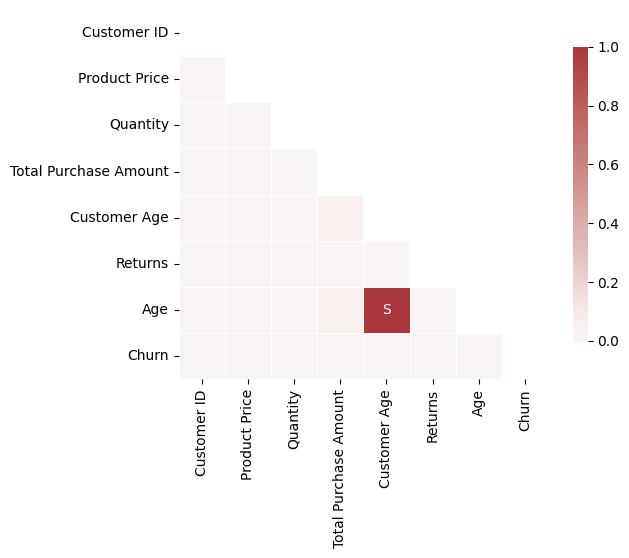

In [ ]:
corr = customer_data.corr('spearman')
sns.heatmap(corr,
            annot = np.where(np.abs(corr)>0.75,'S', # correlation more than +/- 75% labelled as 'STRONG CORRELATION'
                      np.where(np.abs(corr)>0.5,'M', # correlation more than +/- 50% labelled as 'MEDIUM CORRELATION'
                           np.where(np.abs(corr)>0.25,'W',''))), # correlation more than +/- 25% labelled as 'WEAK CORRELATION'
            mask=np.triu(np.ones_like(corr, dtype=bool)),
            square=True,
            center=0,fmt='', linewidths=.5,
            cmap="vlag", cbar_kws={"shrink": 0.8}
            )

In [ ]:
# Drop multiple columns in one statement
cd_p = customer_data.drop(columns=['Age', 'Customer ID', 'Customer Name','Purchase Date'])


In [ ]:
cd_p = cd_p.dropna()

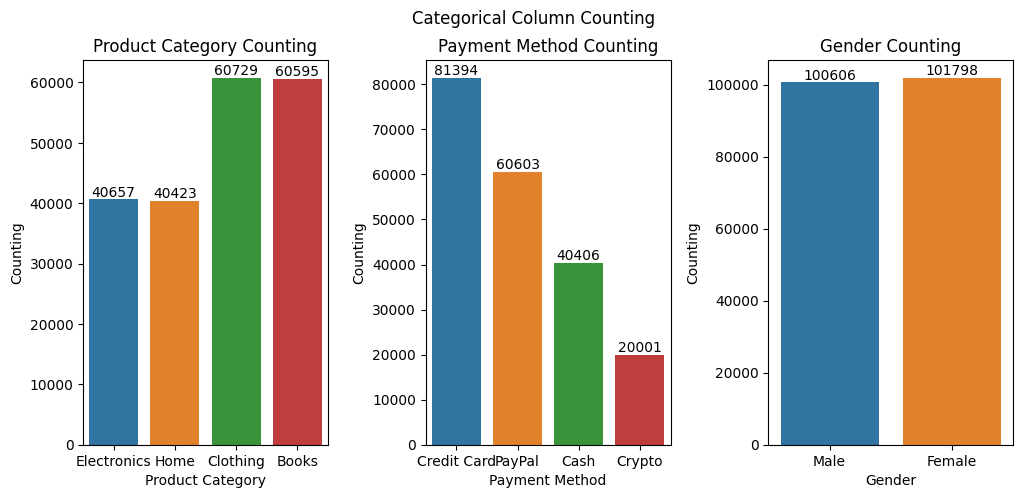

In [ ]:
fig = plt.figure(figsize=(12, 5))
fig.add_subplot(131)
ax = sns.countplot(data=cd_p, x='Product Category')
ax.set(title='Product Category Counting', ylabel='Counting')
for label in ax.containers:
    ax.bar_label(label)


fig.add_subplot(132)
ax = sns.countplot(data=cd_p, x='Payment Method')
ax.set(title='Payment Method Counting', ylabel='Counting')
for label in ax.containers:
    ax.bar_label(label)

fig.add_subplot(133)
ax = sns.countplot(data=cd_p, x='Gender')
ax.set(title='Gender Counting', ylabel='Counting')
for label in ax.containers:
    ax.bar_label(label)

plt.subplots_adjust(hspace=.5, wspace=.4)
plt.suptitle('Categorical Column Counting')
plt.show()

<ipython-input-19-d5674b855e87>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = cd_p.corr()


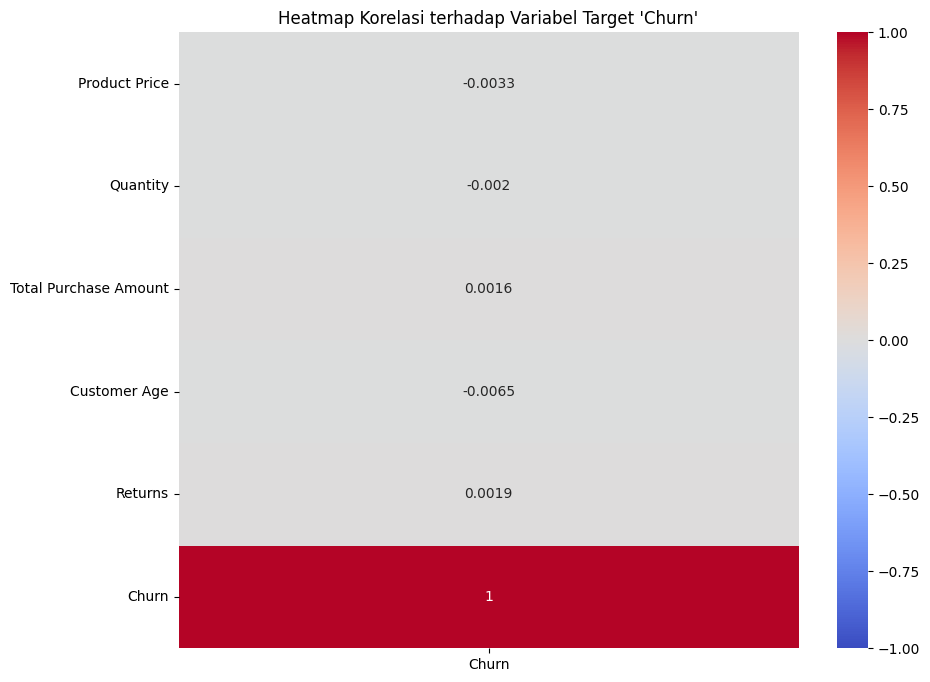

In [ ]:
# Menghitung matriks korelasi
correlation_matrix = cd_p.corr()

# Menentukan ukuran gambar
plt.figure(figsize=(10, 8))

# Menggambar heatmap korelasi terhadap variabel target 'Churn'
sns.heatmap(correlation_matrix[['Churn']], annot=True, cmap='coolwarm', vmin=-1, vmax=1)

# Menambahkan judul
plt.title("Heatmap Korelasi terhadap Variabel Target 'Churn'")

# Menampilkan heatmap
plt.show()

In [ ]:
cd_p.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 202404 entries, 0 to 249999
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Product Category       202404 non-null  object 
 1   Product Price          202404 non-null  int64  
 2   Quantity               202404 non-null  int64  
 3   Total Purchase Amount  202404 non-null  int64  
 4   Payment Method         202404 non-null  object 
 5   Customer Age           202404 non-null  int64  
 6   Returns                202404 non-null  float64
 7   Gender                 202404 non-null  object 
 8   Churn                  202404 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 15.4+ MB


In [ ]:
object_column = ['Gender']
cd_pencoded = cd_p.copy()
for column in object_column:
    cd_p[column] = cd_p[column].astype('category')
    cd_p[column] = cd_p[column].cat.codes
cd_p

,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Gender,Churn
0,Electronics,12,3,740,Credit Card,37,0.0,1,0
1,Home,468,4,2739,PayPal,37,0.0,1,0
2,Home,288,2,3196,PayPal,37,0.0,1,0
3,Clothing,196,1,3509,PayPal,37,0.0,1,0
4,Home,449,1,3452,Credit Card,49,0.0,0,1
...,...,...,...,...,...,...,...,...,...
249995,Clothing,279,2,2187,PayPal,55,1.0,1,1
249996,Home,27,1,3615,Credit Card,42,1.0,0,1
249997,Home,17,5,2466,Cash,41,0.0,1,0
249998,Books,398,2,3668,Crypto,34,0.0,0,1


In [ ]:
cd_p['Payment Method'].value_counts()

Credit Card    81394
PayPal         60603
Cash           40406
Crypto         20001
Name: Payment Method, dtype: int64

In [ ]:
cd_p = pd.get_dummies(cd_p, columns=['Payment Method'])
cd_p = pd.get_dummies(cd_p, columns=['Product Category'])

In [ ]:
cd_p.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 202404 entries, 0 to 249999
Data columns (total 15 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Product Price                 202404 non-null  int64  
 1   Quantity                      202404 non-null  int64  
 2   Total Purchase Amount         202404 non-null  int64  
 3   Customer Age                  202404 non-null  int64  
 4   Returns                       202404 non-null  float64
 5   Gender                        202404 non-null  int8   
 6   Churn                         202404 non-null  int64  
 7   Payment Method_Cash           202404 non-null  uint8  
 8   Payment Method_Credit Card    202404 non-null  uint8  
 9   Payment Method_Crypto         202404 non-null  uint8  
 10  Payment Method_PayPal         202404 non-null  uint8  
 11  Product Category_Books        202404 non-null  uint8  
 12  Product Category_Clothing     202404 non-nul

# Splitting Data & ANN

In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
# Separate features (X) and target (y)
X = cd_p.drop('Churn', axis=1)
y = cd_p['Churn']

In [ ]:
# Step 1: Data Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
def create_ann_model():
    model = Sequential([
        Dense(64, activation='relu', input_dim=X_train.shape[1]),  # Input layer with 128 neurons
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')  # Output layer for binary classification
    ])
    return model

In [ ]:
# Create the model
ann_model = create_ann_model()

# Step 4: Compile the Model
ann_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Step 5: Train the Model
ann_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.1)  # Adjust epochs and batch_size as needed

Epoch 1/100
4555/4555 [==============================] - 12s 2ms/step - loss: 0.5016 - accuracy: 0.8010 - val_loss: 0.4974 - val_accuracy: 0.8026
Epoch 2/100
4555/4555 [==============================] - 9s 2ms/step - loss: 0.4999 - accuracy: 0.8014 - val_loss: 0.4978 - val_accuracy: 0.8026
Epoch 3/100
4555/4555 [==============================] - 11s 2ms/step - loss: 0.4995 - accuracy: 0.8014 - val_loss: 0.4971 - val_accuracy: 0.8026
Epoch 4/100
4555/4555 [==============================] - 12s 3ms/step - loss: 0.4993 - accuracy: 0.8014 - val_loss: 0.4977 - val_accuracy: 0.8026
Epoch 5/100
4555/4555 [==============================] - 11s 2ms/step - loss: 0.4991 - accuracy: 0.8014 - val_loss: 0.4977 - val_accuracy: 0.8026
Epoch 6/100
4555/4555 [==============================] - 10s 2ms/step - loss: 0.4990 - accuracy: 0.8014 - val_loss: 0.4972 - val_accuracy: 0.8026
Epoch 7/100
4555/4555 [==============================] - 9s 2ms/step - loss: 0.4988 - accuracy: 0.8014 - val_loss: 0.4976 - v